In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from PIL import Image
import os 
import os.path as osp
from tqdm import tqdm
import scipy.io

## Exploration of data 

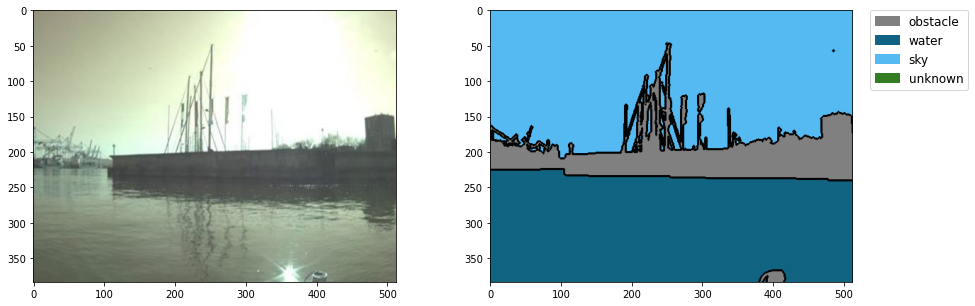

In [2]:
img_filename = "0001"
img = cv2.imread(f"../data/raw/mastr1325/images/{img_filename}.jpg")
imu = cv2.imread(f"../data/raw/mastr1325/imus/{img_filename}.png")
mask = cv2.imread(f"../data/raw/mastr1325/masks/{img_filename}m.png")

size = 5

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(size*3, size))
ax[0].imshow(img)

palette = np.array([ 
    [128, 128, 128], 
    [16, 100, 130], 
    [85, 185, 242], 
    [53, 125, 34],
])

classes = ["obstacle", "water", "sky", "unknown"]

# create a patch (proxy artist) for every color 
patches = [mpatches.Patch(
    color=np.array(palette[i])/255., 
    label=classes[i]) 
    for i in range(4)
]

ax[1].legend(
    handles=patches, 
    bbox_to_anchor=(1.05, 1), 
    loc=2, 
    borderaxespad=0., 
    fontsize='large'
)

segmask = Image.fromarray(mask[..., 0]).convert("P")
segmask.putpalette(np.array(palette, dtype=np.uint8))
ax[1].imshow(segmask.convert("RGB"))
plt.show()

In [3]:
img.shape

(384, 512, 3)

In [4]:
(mask[..., 0] == mask[..., 1]).all()

True

  0%|          | 0/1325 [00:00<?, ?it/s]


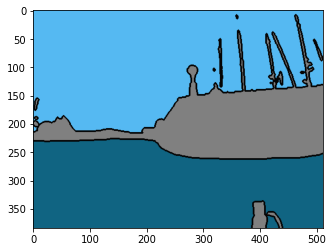

In [5]:
dataset_folder = "../data/raw/mastr1325"
ann_folder = osp.join(dataset_folder, "masks")

palette_array = np.array(palette, dtype=np.uint8)

for filename in tqdm(os.listdir(ann_folder)):
    mask = cv2.imread(osp.join(ann_folder, filename)).astype(np.uint8)
    mask = Image.fromarray(mask[..., 0]).convert("P")
    mask.putpalette(palette_array)
    plt.imshow(mask.convert("RGB"))
    break

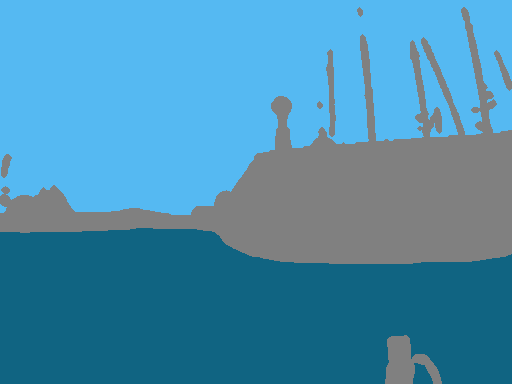

In [6]:
mask

# MODD2 

(array([[   1,  573],
       [   8,  573],
       [  90,  570],
       [ 110,  563],
       [ 340,  558],
       [ 917,  542],
       [1278,  532],
       [1278,  532]], dtype=uint16), array([], shape=(0, 4), dtype=uint8))


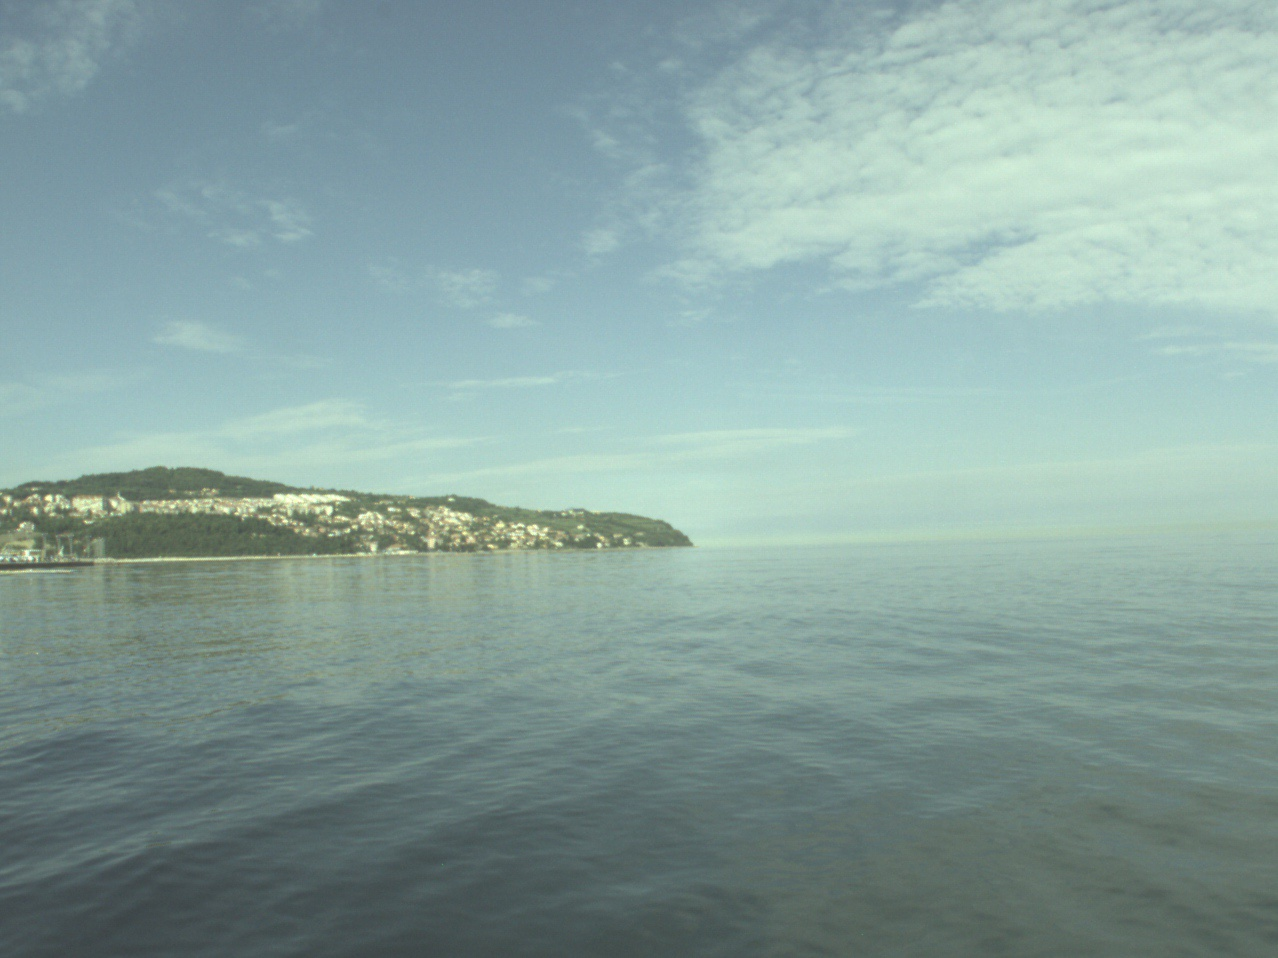

In [7]:
ann = scipy.io.loadmat(
    "../data/raw/modd2/annotations_v2_redone/kope82-00-00012030-00012700/ground_truth/00012695L.mat"
)
img = Image.open("../data/raw/modd2/video_data/kope82-00-00012030-00012700/frames/00012695L.jpg")

x = np.array(ann["annotations"])[0][0]
print(x)

img